In [1]:
#get gammas from Lmid and kappa setting R=1 and tau=1
def get_gammas(Lmid, kappa):
    
    a = 0.25*(Lmid**2*kappa**2 - 0.5*(2*np.pi*Lmid+1)**2)**2 + 17*17/16 - (34/16)*(2*np.pi*Lmid+1)**2
    b = (17/4 - 0.25*(2*np.pi*Lmid+1)**2)**2
    c = 1/(17/4 - 0.25*(2*np.pi*Lmid + 1)**2 - 2)
    gamma0 = a*c/(a-b)
    gamma2 = -2*np.sqrt(b)*c/(a-b)
    gamma4 = c/(a-b)
    
    return (gamma0, gamma2, gamma4)

#define function that returns the neutral ell's for a given R/Lambda and kappa
def get_l(Lmid, kappa):
    
    gamma0, gamma2, gamma4 = get_gammas(Lmid, kappa)
    delta_p = (0.5/gamma4)*(-gamma2+np.sqrt(gamma2**2-4*gamma0*gamma4))
    delta_m = (0.5/gamma4)*(-gamma2-np.sqrt(gamma2**2-4*gamma0*gamma4))
    
    l_p = 0.5*(-1+np.sqrt(17+4*delta_p))
    l_m = 0.5*(-1+np.sqrt(17+4*delta_m))
        
    return l_m, l_p  

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
gamma0, gamma2, gamma4 = get_gammas(8, 1)
l_m, l_p = get_l(8,1)

In [4]:
def Xi(ell):
    delta = (ell*(ell+1) - 4)
    return -(delta + 2)*(gamma0 + gamma2*delta + gamma4*delta**2)

//anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


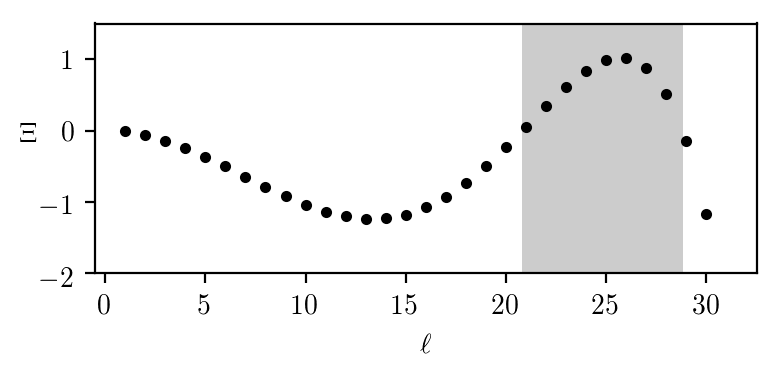

In [5]:
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern Roman'], 'size': 10})
rc('text', usetex=True)

ells = np.arange(1,32)
fig = plt.figure(figsize=(4,2), dpi=200)
ax = plt.axes()
ax.plot(ells, Xi(ells), 'k.')
ax.set_yticks([-2, -1, 0, 1])
ax.set_ylim([-2,1.5])
ax.set_ylabel(r"$\Xi$", rotation=0)
ax.set_xlabel(r"$\ell$")

from matplotlib.patches import Rectangle
rect = Rectangle((l_m, -2), l_p-l_m, 3.5, facecolor='k', alpha=0.2, rasterized=True)
ax.add_patch(rect)

plt.tight_layout()

plt.savefig("../plots/figure0_raw.pdf")

In [6]:
get_gammas(8,1)

(0.014335587575618248, -4.86002034541143e-05, 3.72251377319165e-08)

In [10]:
(1/2)**2/0.055

4.545454545454546